In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [3]:
df= pd.read_csv('ordinal_label_encoding.csv')

In [5]:
df

,Customer_ID,Education_Level,Satisfaction,Gender,Income,Age,Spending_Score,Product_Category,Loyalty_Level,Region
0,1,Master,High,Female,72107,52,16,Groceries,Silver,West
1,2,PhD,Medium,Female,116202,34,61,Furniture,Gold,West
2,3,High School,Medium,Female,81663,45,64,Furniture,Platinum,North
3,4,Master,Medium,Female,45708,47,63,Clothing,Platinum,West
4,5,Master,Medium,Female,79811,46,69,Electronics,Bronze,South
...,...,...,...,...,...,...,...,...,...,...
95,96,Bachelor,Low,Male,35600,51,73,Clothing,Platinum,South
96,97,Bachelor,Medium,Male,70764,49,24,Clothing,Platinum,North
97,98,PhD,Low,Female,104543,42,64,Electronics,Platinum,South
98,99,Bachelor,Low,Female,75714,57,99,Electronics,Silver,North


In [7]:
# Define order for satisfaction and loyalty
satisfaction_order = ['Low', 'Medium', 'High']
loyalty_order = ['Bronze', 'Silver', 'Gold', 'Platinum']

# Create encoders
ordinal_enc = OrdinalEncoder(categories=[satisfaction_order, loyalty_order])

# Apply on ordered columns
df[['Satisfaction_Encoded', 'Loyalty_Encoded']] = ordinal_enc.fit_transform(
    df[['Satisfaction', 'Loyalty_Level']]
)

# Show results
print(df[['Satisfaction', 'Satisfaction_Encoded', 'Loyalty_Level', 'Loyalty_Encoded']].head())


  Satisfaction  Satisfaction_Encoded Loyalty_Level  Loyalty_Encoded
0         High                   2.0        Silver              1.0
1       Medium                   1.0          Gold              2.0
2       Medium                   1.0      Platinum              3.0
3       Medium                   1.0      Platinum              3.0
4       Medium                   1.0        Bronze              0.0


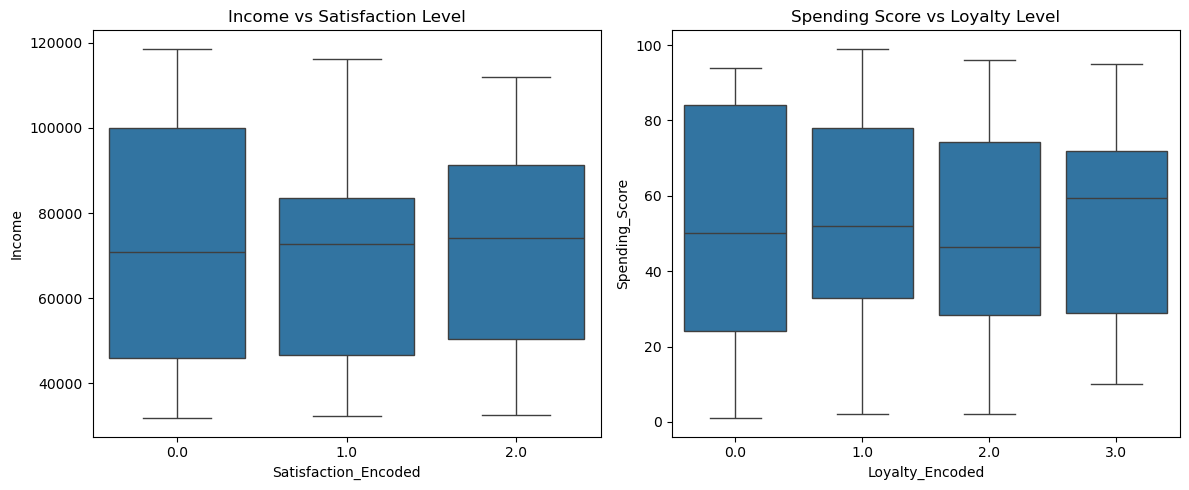

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.boxplot(x='Satisfaction_Encoded', y='Income', data=df, ax=axes[0])
axes[0].set_title('Income vs Satisfaction Level')

sb.boxplot(x='Loyalty_Encoded', y='Spending_Score', data=df, ax=axes[1])
axes[1].set_title('Spending Score vs Loyalty Level')

plt.tight_layout()
plt.show()


In [13]:
# Apply label encoding
label_enc = LabelEncoder()
df['Gender_Encoded'] = label_enc.fit_transform(df['Gender'])
df['Region_Encoded'] = label_enc.fit_transform(df['Region'])
df['Product_Encoded'] = label_enc.fit_transform(df['Product_Category'])

print(df[['Gender', 'Gender_Encoded', 'Region', 'Region_Encoded']].head())


   Gender  Gender_Encoded Region  Region_Encoded
0  Female               0   West               3
1  Female               0   West               3
2  Female               0  North               1
3  Female               0   West               3
4  Female               0  South               2


In [15]:
df


,Customer_ID,Education_Level,Satisfaction,Gender,Income,Age,Spending_Score,Product_Category,Loyalty_Level,Region,Satisfaction_Encoded,Loyalty_Encoded,Gender_Encoded,Region_Encoded,Product_Encoded
0,1,Master,High,Female,72107,52,16,Groceries,Silver,West,2.0,1.0,0,3,3
1,2,PhD,Medium,Female,116202,34,61,Furniture,Gold,West,1.0,2.0,0,3,2
2,3,High School,Medium,Female,81663,45,64,Furniture,Platinum,North,1.0,3.0,0,1,2
3,4,Master,Medium,Female,45708,47,63,Clothing,Platinum,West,1.0,3.0,0,3,0
4,5,Master,Medium,Female,79811,46,69,Electronics,Bronze,South,1.0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Bachelor,Low,Male,35600,51,73,Clothing,Platinum,South,0.0,3.0,1,2,0
96,97,Bachelor,Medium,Male,70764,49,24,Clothing,Platinum,North,1.0,3.0,1,1,0
97,98,PhD,Low,Female,104543,42,64,Electronics,Platinum,South,0.0,3.0,0,2,1
98,99,Bachelor,Low,Female,75714,57,99,Electronics,Silver,North,0.0,1.0,0,1,1


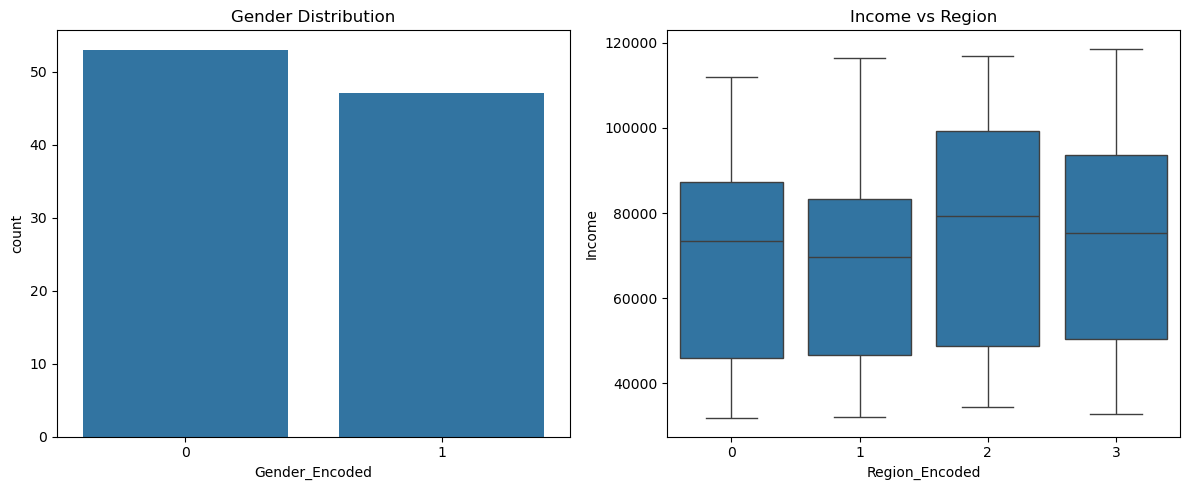

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.countplot(x='Gender_Encoded', data=df, ax=axes[0])
axes[0].set_title('Gender Distribution')

sb.boxplot(x='Region_Encoded', y='Income', data=df, ax=axes[1])
axes[1].set_title('Income vs Region')

plt.tight_layout()
plt.show()
